In [11]:
%cd week2
%pwd

/opt/projects/ml_class/mlad_spec/math_python/week2


u'/opt/projects/ml_class/mlad_spec/math_python/week2'

In [48]:
import re
import scipy.linalg
from math import sin, exp
import numpy as np
import pandas as pd
import scipy
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [20]:
# task 1
f = open('sentences.txt', 'r')
text = f.read().lower()
sentences = []
uniqueWords = {}
    
i = 0
for sentence in filter(None, text.split('\n')):
    words = filter(None, re.split('[^a-z]', sentence))
    sentences.append(words)
    for word in words:
        if word not in uniqueWords:
            uniqueWords[word] = i
            i += 1

matrix = []
for sentenceWords in sentences:
    row = [0 for x in uniqueWords]
    for word, word_index in uniqueWords.items():
        if word in sentenceWords:
            row[word_index] += 1
    matrix.append(row)

cosDistances = {}
firstLine = matrix[0]
i = 0
for vector in matrix:
    cosDistances[i] = cosine(firstLine, vector)
    i+=1

result = []
for key, value in sorted(cosDistances.iteritems(), key=lambda (k,v): (v,k)):
    result.append(str(key))

af = open('task1.txt', 'w')
af.write(" ".join(result[1:3]))
print " ".join(result[1:3])
af.close()

6 4


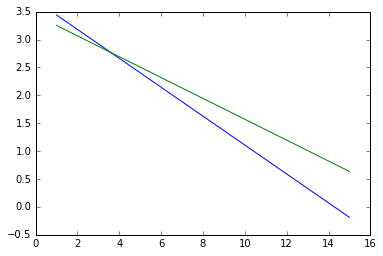

[ 3.43914511 -0.18692825]


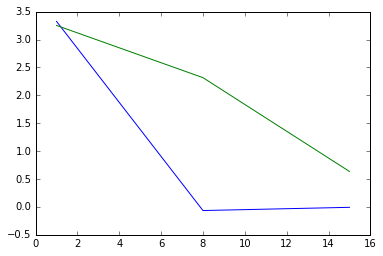

[ 3.32512949 -0.06531159 -0.00760104]


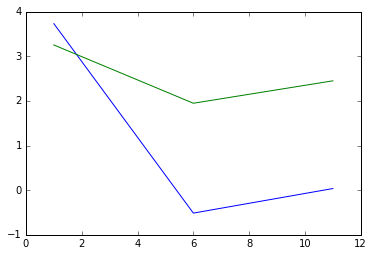

[ 3.73006385 -0.5139883   0.03614131]


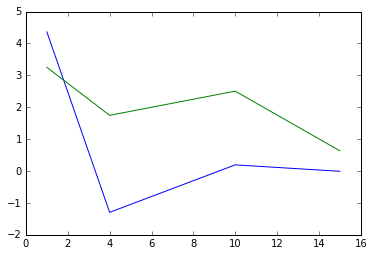

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [72]:
# task 2
def approximated(function, points):
    rank = len(points)
    A = []
    b = []
    for point in points:
        A.append([point ** n for n in range(0, rank)])
        b.append(function(point))
    result = scipy.linalg.solve(A, b)
    plt.plot(points, result, points, b)
    plt.show()
    return result
        
function = lambda x: sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)

print approximated(function, [1, 15])
print approximated(function, [1, 8, 15])
last = approximated(function, [1, 4, 10, 15])
print last

af = open('task2.txt', 'w')
af.write(" ".join(map(lambda x: str(x), last)))
af.close()